# Titanic Dataset – Exploratory Data Analysis (EDA)

## Problem Statement

The Titanic disaster of 1912 resulted in the loss of many lives after the ship collided with an iceberg. However, survival was not random and appeared to depend on several factors such as passenger class, age, gender, and family relationships.

The problem is to analyze the Titanic dataset to understand **which factors influenced passenger survival** and identify meaningful patterns and relationships within the data.

---

## Objective

The main objectives of performing Exploratory Data Analysis (EDA) on the Titanic dataset are:

- To understand the structure and characteristics of the dataset  
- To analyze the distribution of passengers based on demographic and socio-economic features  
- To identify key factors that affected survival rates  
- To detect missing values, outliers, and data quality issues  
- To uncover relationships between variables using statistical and visual analysis  
- To generate insights that can help build predictive models for survival  


## Column Description

| Column Name | Description |
|------------|-------------|
| **PassengerId** | Unique identifier assigned to each passenger |
| **Survived** | Survival status of the passenger (0 = No, 1 = Yes) |
| **Pclass** | Passenger class (1 = First class, 2 = Second class, 3 = Third class) |
| **Name** | Full name of the passenger |
| **Sex** | Gender of the passenger |
| **Age** | Age of the passenger (in years) |
| **SibSp** | Number of siblings or spouses aboard the Titanic |
| **Parch** | Number of parents or children aboard the Titanic |
| **Ticket** | Ticket number |
| **Fare** | Fare paid by the passenger |
| **Cabin** | Cabin number assigned to the passenger |
| **Embarked** | Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton) |

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
df=pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [95]:
df.shape

(891, 12)

In [96]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [97]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [98]:
missing=(df.isnull().mean().mul(100).sort_values(ascending=False))
missing_df=missing.reset_index()
missing_df.columns=["Feature","Missing Percentage"]
missing_df
         

,Feature,Missing Percentage
0,Cabin,77.104377
1,Age,19.865320
2,Embarked,0.224467
3,PassengerId,0.000000
4,Survived,0.000000
5,Pclass,0.000000
6,Name,0.000000
7,Sex,0.000000
8,SibSp,0.000000
9,Parch,0.000000


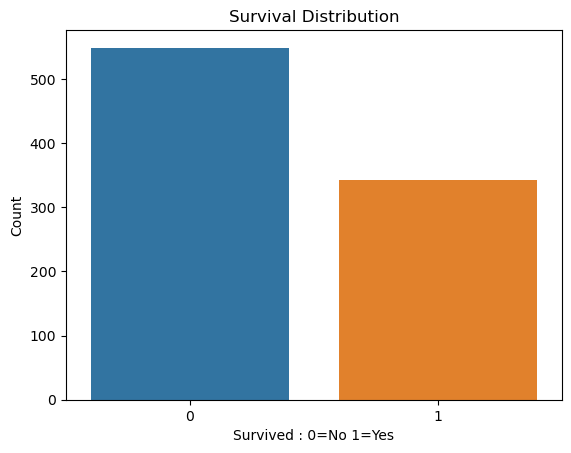

In [99]:
sns.countplot(x="Survived",data=df)
plt.ylabel("Count")
plt.xlabel("Survived : 0=No 1=Yes")
plt.title("Survival Distribution")
plt.show()

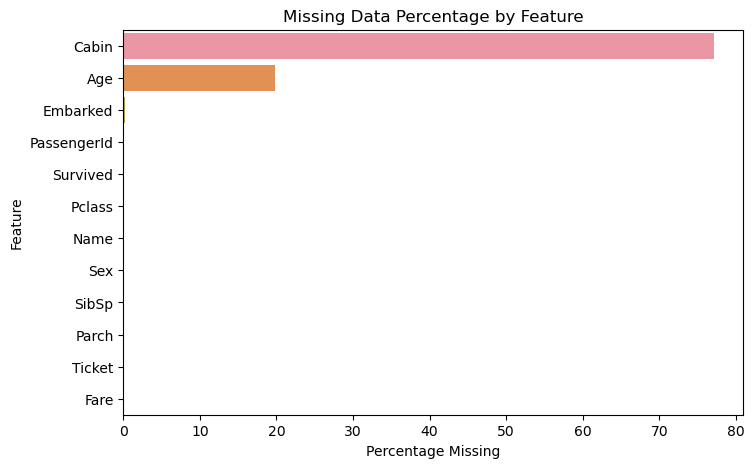

In [100]:
plt.figure(figsize=(8, 5))
sns.barplot(data=missing_df,x="Missing Percentage",y="Feature")
plt.xlabel("Percentage Missing")
plt.ylabel("Feature")
plt.title("Missing Data Percentage by Feature")
plt.show()


<ul>
    <li>INSIGHTS:</li>
    <li>As only cabin and Age column has missing values, so it shows that missing values are not uniforly spread. </li>
    <li>This missingness reflects socioeconimic or structural factors. </li>
</ul>

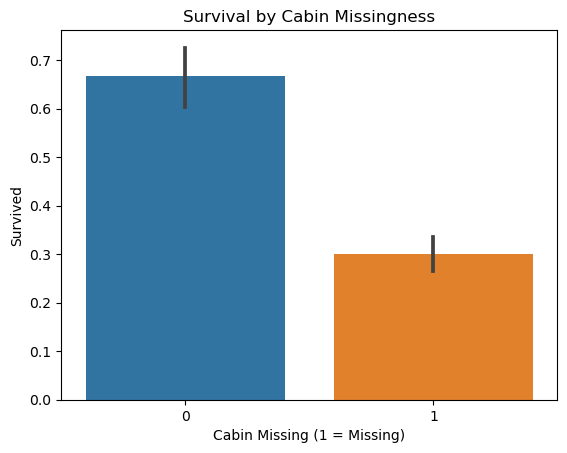

In [102]:
df["Cabin_Missing"]=df["Cabin"].isnull().astype(int)
df["Age_Missing"]=df["Age"].isnull().astype(int)

sns.barplot(x=df["Cabin_Missing"],y=df["Survived"])
plt.xlabel("Cabin Missing (1 = Missing)")
plt.title("Survival by Cabin Missingness")
plt.show()


<ul>
    INSIGHTS:
    <li>Passengers with missing cabin information had a lower survival rate.</li>
    <li>It indicates that pssengers cabin missingness in systematically associated with passenger outcomes.</li>
</ul>

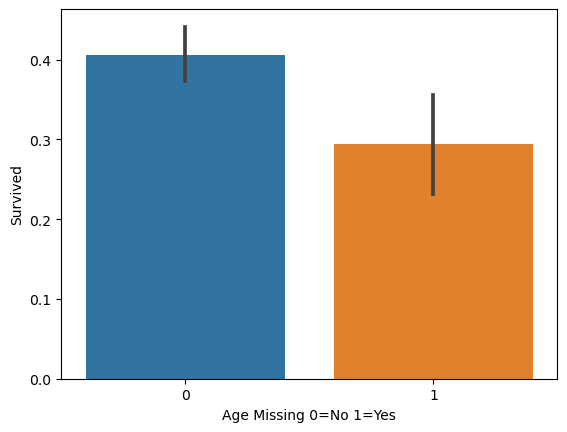

In [104]:
sns.barplot(x=df["Age_Missing"],y=df["Survived"])
plt.xlabel("Age Missing 0=No 1=Yes")
plt.ylabel("Survived")
plt.show()

<ul>
    INSIGHTS:
    <li>As expected, Similar to cabin missingness here is a clear pattern as well.</li>
    <li>Age missingness is also not random but could be imputed conditionally.  </li>
</ul>

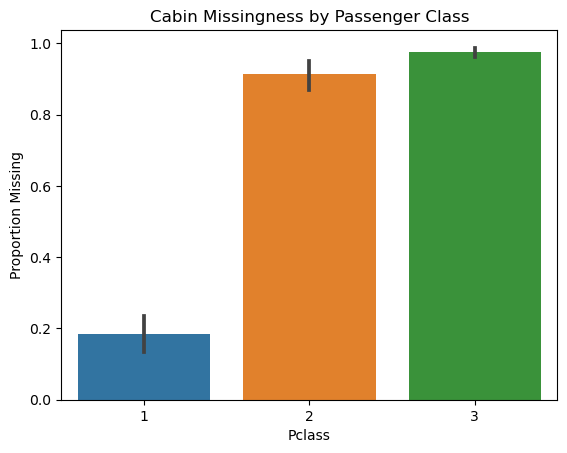

In [106]:
sns.barplot(
    x="Pclass",
    y="Cabin_Missing",
    data=df
)
plt.title("Cabin Missingness by Passenger Class")
plt.ylabel("Proportion Missing")
plt.show()


COMBINED INSIGHT:
<ul>
    <li>The pattern of missing data is structured  rather than random.</li>
    <li>Cabin information is missinng makorly for lower-class passengers and results in reduced survived probability.</li>
    <li>These findings clearly indicate that missing values encode meaningful social and spatial information.</li>
</ul>

<h1>HANDLING MISSING VALUES</h1>

In [109]:
df["Age"]=df["Age"].fillna(df["Age"].median())

In [110]:
df["HasCabin"]=df["Cabin"].notna().astype(int)
df["Deck"]=df["Cabin"].str[0]
df["Deck"]=df["Deck"].fillna("Unknown")

In [111]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Missing,Age_Missing,HasCabin,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,0,Unknown
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0,Unknown
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,0,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,0,0,Unknown
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0,1,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,1,1,0,Unknown
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,0,1,C


<p>Missing Cabin Values were not random, instead they reflected passenger location and class. I converted them into meaningful features instead of filling them blindly.</p>

In [113]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_Missing',
       'Age_Missing', 'HasCabin', 'Deck'],
      dtype='object')

In [114]:
columns=['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_Missing',
       'Age_Missing', 'HasCabin', 'Deck']

for i in df.columns:
    print(f"{df[i]}: {df[i].unique()}")
    print("************************************************")

0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 2

<h1> FEATURE  ENGINEERING</h1>

1. Changing Sex in binary numbers

In [117]:
df["IsFemale"]=(df["Sex"]=="female").astype(int)

2. Social Ranking Signal

In [119]:
df["IsFirstClass"]=(df['Pclass']==1).astype(int)
df["IsThridClass"]=(df['Pclass']==3).astype(int)

3. Grouping for age

In [121]:
df["IsChild"]=(df['Age']<14).astype(int)
df["IsAdult"]=(df['Age']>60).astype(int)


4. Family Coordination

In [123]:
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
df["IsAlone"] = (df["FamilySize"] == 1).astype(int)
def family_type(size):
    if size == 1:
        return "Alone"
    elif size <= 4:
        return "Small"
    else:
        return "Large"

df["FamilyType"] = df["FamilySize"].apply(family_type)


Feature engineering was intentionally limited to variables that have a clear behavioral or structural interpretation. This avoids overfitting and preserves interpretability while still capturing the dominant survival mechanisms.

<h1>VISUALIZATION</h1>

<h2>1. Survival by Gender</h2>

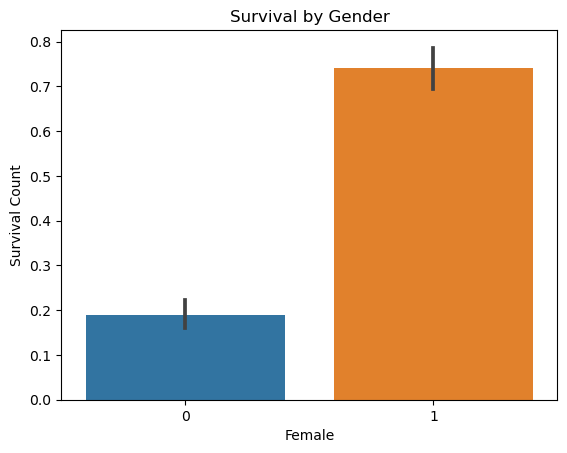

In [127]:
sns.barplot(x=df["IsFemale"],y=df["Survived"])
plt.title("Survival by Gender")
plt.xlabel("Female")
plt.ylabel("Survival Count")
plt.show()

INSIGHT:
<ul><li>Women have significantly higher  survival rate, that indicates the inclusion of gender as a key feature.</li></ul>

<h2>Survival by Class</h2>

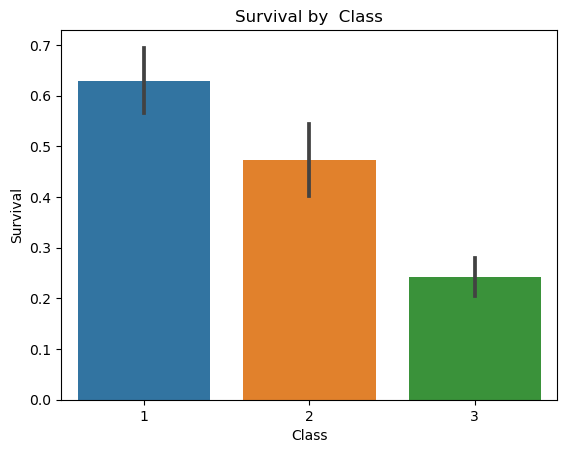

In [130]:
sns.barplot(x=df["Pclass"],y=df["Survived"])
plt.title("Survival by  Class")
plt.xlabel("Class")
plt.ylabel("Survival")
plt.show()

INSIGHTS:
<ul><li>Survival Probability decreases monotonically with passenger class.</li></ul>

<h2>Survival by Age</h2>

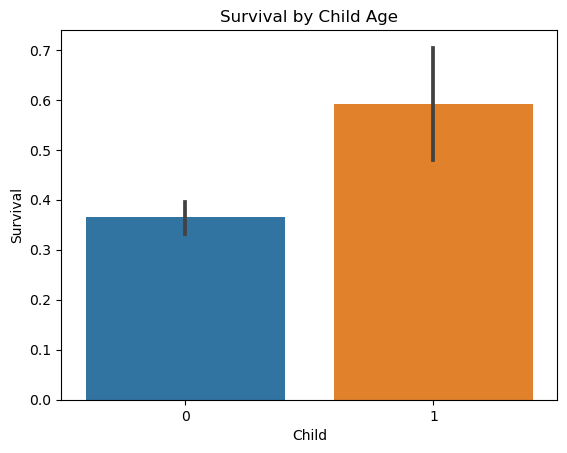

In [133]:
sns.barplot(x=df["IsChild"],y=df["Survived"])
plt.title("Survival by Child Age")
plt.xlabel("Child")
plt.ylabel("Survival")
plt.show()

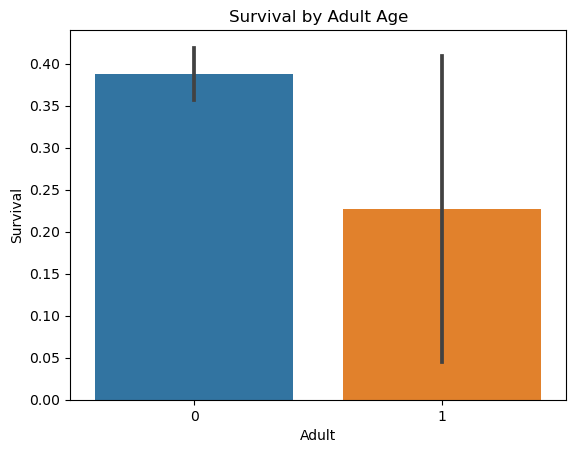

In [134]:
sns.barplot(x=df["IsAdult"],y=df["Survived"])
plt.title("Survival by Adult Age")
plt.xlabel("Adult")
plt.ylabel("Survival")
plt.show()

INSIGHTS:
<ul><li>Children were priorituze during evacuation, while elderly passengers did not receive comparable protecction.</li></ul>

<h2>Survival by Family Structure</h2>

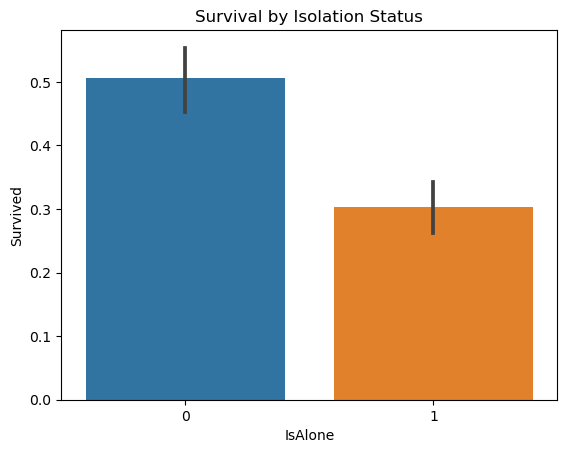

In [137]:
sns.barplot(x="IsAlone", y="Survived", data=df)
plt.title("Survival by Isolation Status")
plt.show()


INSIGHTS:
<ul><li>Passengers traveling alone had signifiantly lower survival rates.</li></ul>

<h2>Survival by Gender and Class</h2>

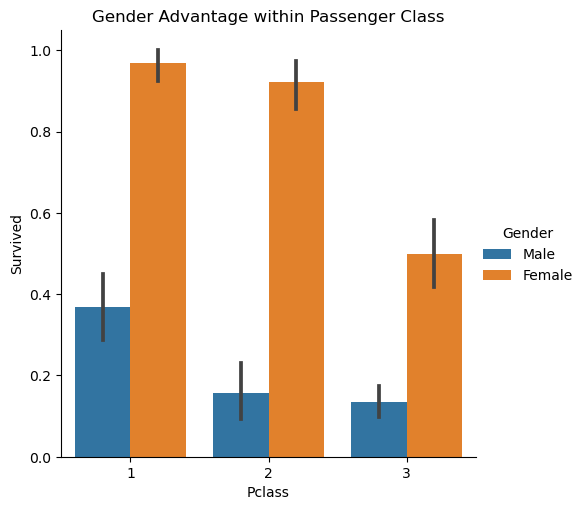

In [170]:
df["Gender"] = df["IsFemale"].map({0: "Male", 1: "Female"})

sns.catplot(
    x="Pclass",
    y="Survived",
    hue="Gender",
    kind="bar",
    data=df
)
plt.title("Gender Advantage within Passenger Class")
plt.show()


INSIGHTS:
<ul><li>Gender Advantge weakens in lower classes that indcates physicl access contraints.</li></ul>

<h2>Survival By Gender and Family</h2>

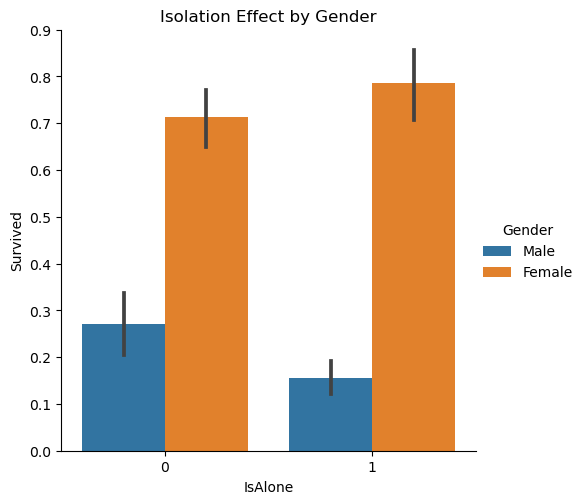

In [176]:
sns.catplot(
    x="IsAlone", y="Survived",
    hue="Gender", kind="bar",
    data=df
)
plt.title("Isolation Effect by Gender")
plt.show()


INSIGHTS:
<ul><li>Passengers who traveled alone had lower survival rates, and this effect was much stronger for men than for women.</li></ul>

<h2>Survival by Child Status and Class</h2>

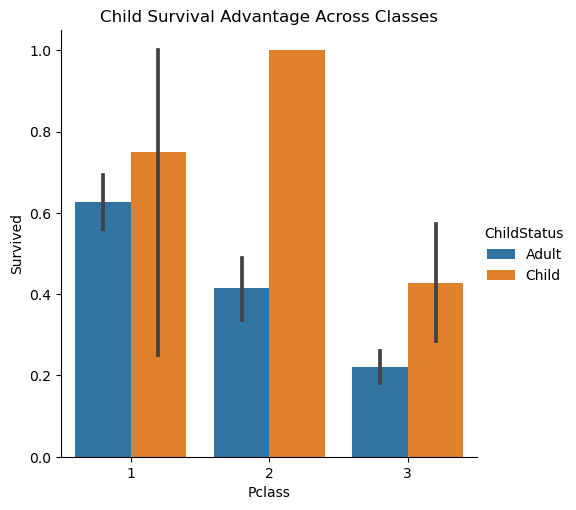

In [179]:
df["ChildStatus"] = df["IsChild"].map({0: "Adult", 1: "Child"})

sns.catplot(
    x="Pclass", y="Survived",
    hue="ChildStatus", kind="bar",
    order=[1, 2, 3],
    data=df
)
plt.title("Child Survival Advantage Across Classes")
plt.show()


INSIGHTS:
<ul><li>Child survival advantage is strongest in upper classes.</li></ul>

<h2>Gender and Isolation Effects</h2>

In [191]:
df.groupby("IsFemale")["Survived"].mean()

IsFemale
0    0.188908
1    0.742038
Name: Survived, dtype: float64

In [189]:
df.groupby("IsAlone")["Survived"].mean()

IsAlone
0    0.505650
1    0.303538
Name: Survived, dtype: float64

INSIGHTS:
<ul><li>While gender emerged as the dominant survival factor, isolation further amplified survival disparities, particularly among male passengers.</li></ul>

<h1>Feature Preparation for Model Training</h1>

In [197]:
from sklearn.model_selection import train_test_split

features=["IsFemale","IsChild","IsAlone","FamilySize","Pclass"]

x=df[features]
y=df['Survived']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [199]:
x

,IsFemale,IsChild,IsAlone,FamilySize,Pclass
0,0,0,0,2,3
1,1,0,0,2,1
2,1,0,1,1,3
3,1,0,0,2,1
4,0,0,1,1,3
...,...,...,...,...,...
886,0,0,1,1,2
887,1,0,1,1,1
888,1,0,0,4,3
889,0,0,1,1,1


In [201]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

<h2>Applying Logistic Regression Mdoel</h2>

In [210]:
from sklearn.linear_model  import  LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr=LogisticRegression()
lr.fit(x_train,y_train)

y_pred=lr.predict(x_test)

print(f"Accuracy: {round(accuracy_score(y_test, y_pred),3)}")
print(f"Classification Report:  \n{classification_report(y_test,y_pred)}")

Accuracy: 0.804
Classification Report:  
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       105
           1       0.79      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



In [231]:
input=pd.DataFrame([[0,1,1,1,1]],columns=["IsFemale", "IsChild", "IsAlone", "FamilySize", "Pclass"])
result=lr.predict(input)
if  result==1:
    print("Result: Survived")
else:
    print("Result: Not Survived")

Result: Survived


<h2>Confusion Matrix</h2>

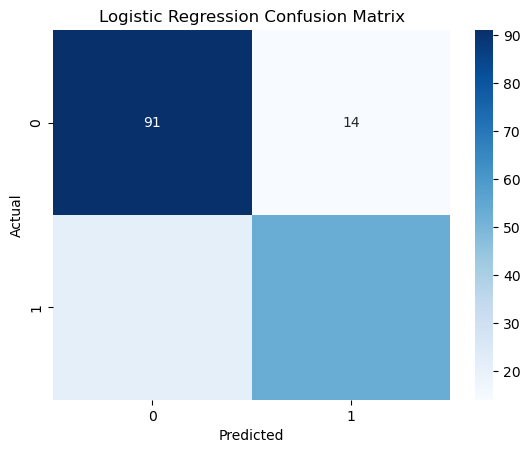

In [213]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

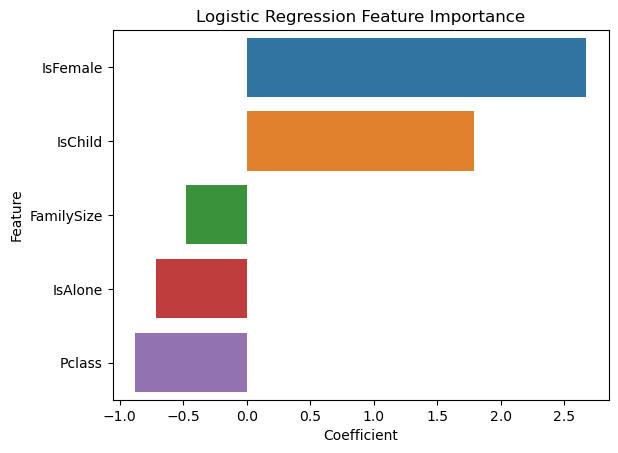

In [215]:
coef_df = pd.DataFrame({
    "Feature": features,
    "Coefficient": lr.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

sns.barplot(x="Coefficient", y="Feature", data=coef_df)
plt.title("Logistic Regression Feature Importance")
plt.show()

INSIGHTS:
<ul><li>IsFemale and IsChild  have stronngly positive importance whereas FamilySize, IsAlone, Pclass has negative impportance.</li></ul>

<h1>CONCLUSION</h1>


This project analyzes passenger survival on the Titanic using exploratory data analysis, feature engineering, and Logistic Regression.

Key survival patterns were identified, with gender emerging as the strongest predictor, followed by social class, age vulnerability, and isolation status.

Feature engineering translated these insights into interpretable variables, enabling effective modeling.

The Logistic Regression model validated the exploratory findings, demonstrating strong alignment between visual analysis and statistical inference.

Overall, the study shows that interpretable models, when supported by thoughtful data analysis, can yield meaningful insights into complex real-world events.